<a href="https://colab.research.google.com/github/GuruPatel45/Image_Classification_Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.listdir('/content/drive/MyDrive')


['Colab Notebooks', 'Image_Classification_Project']

In [ ]:
project_path = '/content/drive/MyDrive/Image_Classification_Project'
os.listdir(project_path)


['dataset', 'cat_dog_model.keras']

In [ ]:
dataset_path = project_path + '/dataset'
os.listdir(dataset_path)


['train', 'test']

In [ ]:
len(os.listdir(dataset_path + '/train/cat')),
len(os.listdir(dataset_path + '/train/dog'))


1001

In [ ]:
import os
from PIL import Image

def remove_corrupted_images(folder_path):
    removed = 0

    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)

        # 🔥 Skip directories
        if os.path.isdir(img_path):
            continue

        try:
            img = Image.open(img_path)
            img.verify()  # verify image integrity
        except:
            os.remove(img_path)
            removed += 1

    return removed


In [ ]:
from PIL import Image
import os

def remove_corrupted_images(folder_path):
    removed = 0
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()   # check image
        except:
            os.remove(img_path)
            removed += 1
    return removed


In [ ]:
train_cat = '/content/drive/MyDrive/Image_Classification_Project/dataset/train/cat'
train_dog = '/content/drive/MyDrive/Image_Classification_Project/dataset/train/dog'

test_cat = '/content/drive/MyDrive/Image_Classification_Project/dataset/test/cat'
test_dog = '/content/drive/MyDrive/Image_Classification_Project/dataset/test/dog'

print("Removed from train/cat:", remove_corrupted_images(train_cat))
print("Removed from train/dog:", remove_corrupted_images(train_dog))
print("Removed from test/cat:", remove_corrupted_images(test_cat))
print("Removed from test/dog:", remove_corrupted_images(test_dog))


Removed from train/cat: 0
Removed from train/dog: 0
Removed from test/cat: 0
Removed from test/dog: 0


In [ ]:
print("Train Cat:", len(os.listdir(train_cat)))
print("Train Dog:", len(os.listdir(train_dog)))
print("Test Cat:", len(os.listdir(test_cat)))
print("Test Dog:", len(os.listdir(test_dog)))


Train Cat: 1000
Train Dog: 1001
Test Cat: 1000
Test Dog: 1001


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input



In [ ]:
train_dir = '/content/drive/MyDrive/Image_Classification_Project/dataset/train'
test_dir  = '/content/drive/MyDrive/Image_Classification_Project/dataset/test'



In [ ]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 2001 images belonging to 2 classes.
Found 2001 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # pretrained weights lock


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [149]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 282s 5s/step - accuracy: 0.9895 - loss: 0.0356 - val_accuracy: 0.9910 - val_loss: 0.0362
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 239s 4s/step - accuracy: 0.9882 - loss: 0.0367 - val_accuracy: 0.9915 - val_loss: 0.0346
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 228s 4s/step - accuracy: 0.9958 - loss: 0.0285 - val_accuracy: 0.9945 - val_loss: 0.0284
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 235s 4s/step - accuracy: 0.9932 - loss: 0.0324 - val_accuracy: 0.9965 - val_loss: 0.0255
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step - accuracy: 0.9958 - loss: 0.0229 - val_accuracy: 0.9965 - val_loss: 0.0228


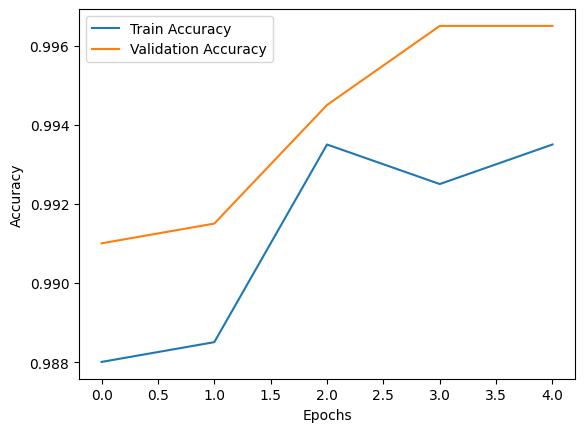

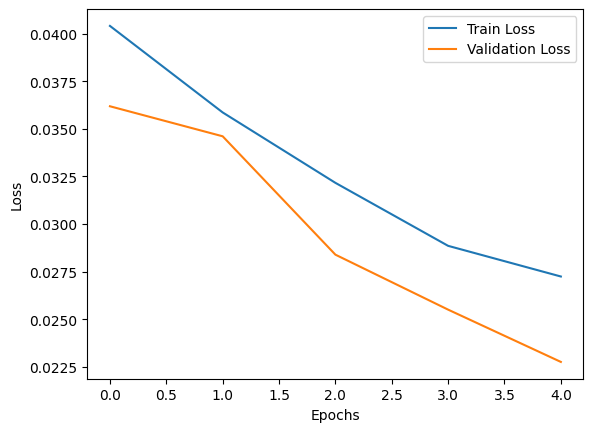

In [150]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [151]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/MyDrive/Image_Classification_Project/dataset/test/dog/1000.jpg'


In [152]:
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Prediction: Dog 🐶")
else:
    print("Prediction: Cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Prediction: Dog 🐶


In [153]:
model.save('/content/drive/MyDrive/Image_Classification_Project/cat_dog_model.keras')


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

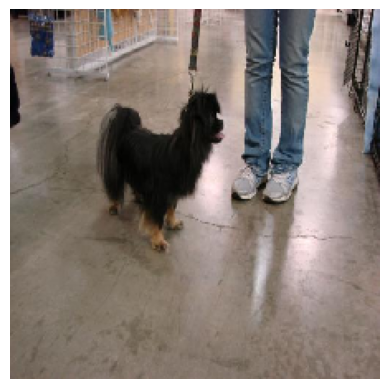

In [154]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.axis('off')


In [176]:
# ====== ALL-IN-ONE SAFE CELL ======
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


# image
img_path = "/content/drive/MyDrive/Image_Classification_Project/dataset/test/dog/100.jpg"

img = image.load_img(img_path, target_size=(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


# base model & layer
base_model = model.get_layer("mobilenetv2_1.00_224")
gap_layer = model.layers[-2]     # GlobalAveragePooling2D
classifier = model.layers[-1]    # Dense




# Grad-CAM
with tf.GradientTape() as tape:
    # Forward pass through backbone
    conv_outputs = base_model(img_array, training=False)
    tape.watch(conv_outputs)

    # Forward pass through classifier head
    pooled = gap_layer(conv_outputs)
    predictions = classifier(pooled)
    loss = predictions[:, 0]


print("Grad-CAM computed successfully ✅")


Grad-CAM computed successfully ✅


In [177]:
# ===== GRAD-CAM HEATMAP GENERATION =====

with tf.GradientTape() as tape:
    conv_outputs = base_model(img_array, training=False)
    tape.watch(conv_outputs)

    pooled = gap_layer(conv_outputs)
    predictions = classifier(pooled)
    loss = predictions[:, 0]

grads = tape.gradient(loss, conv_outputs)

pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

heatmap = tf.maximum(heatmap, 0)
heatmap /= tf.reduce_max(heatmap) + 1e-8

print("Heatmap created ✅")


Heatmap created ✅


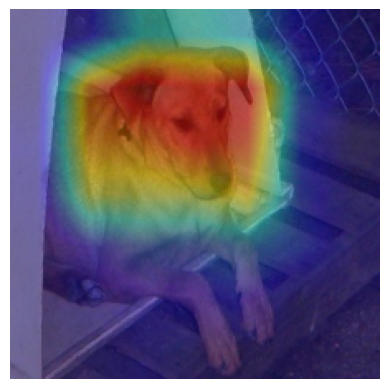

In [178]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# convert heatmap to numpy if needed
if hasattr(heatmap, "numpy"):
    heatmap_vis = heatmap.numpy()
else:
    heatmap_vis = heatmap

heatmap_vis = cv2.resize(heatmap_vis, (224,224))
heatmap_vis = np.uint8(255 * heatmap_vis)
heatmap_color = cv2.applyColorMap(heatmap_vis, cv2.COLORMAP_JET)

original = cv2.imread(img_path)
original = cv2.resize(original, (224,224))

overlay = cv2.addWeighted(original, 0.6, heatmap_color, 0.4, 0)

plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [163]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,829 (8.63 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,564 (10.02 KB)

In [173]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def run_complete_image_analysis(model, img_path, img_size=(224,224)):
    # -------- Load & preprocess image --------
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # -------- Extract base model & layers --------
    base_model = model.get_layer("mobilenetv2_1.00_224")
    gap_layer = model.layers[-2]   # GlobalAveragePooling2D
    classifier = model.layers[-1]  # Dense

    # -------- Forward pass WITH GradientTape --------
    with tf.GradientTape() as tape:
        conv_outputs = base_model(img_array, training=False)
        tape.watch(conv_outputs)

        pooled = gap_layer(conv_outputs)
        preds = classifier(pooled)
        loss = preds[:, 0]

    # -------- Gradients --------
    grads = tape.gradient(loss, conv_outputs)
    if grads is None:
        raise RuntimeError("Gradients are None — check model structure")

    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    # -------- Grad-CAM heatmap --------
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) + 1e-8
    heatmap = heatmap.numpy()

    # -------- Heatmap processing --------
    heatmap_resized = cv2.resize(heatmap, img_size)

    # Heap map (grayscale)
    heap_map = np.uint8(255 * heatmap_resized)
    heap_map_3ch = cv2.cvtColor(heap_map, cv2.COLOR_GRAY2BGR)

    # Heat map (colored)
    heat_map_color = cv2.applyColorMap(heap_map, cv2.COLORMAP_JET)

    # Original image
    original = cv2.imread(img_path)
    original = cv2.resize(original, img_size)

    # Overlays
    overlay_gray = cv2.addWeighted(original, 0.6, heap_map_3ch, 0.4, 0)
    overlay_color = cv2.addWeighted(original, 0.6, heat_map_color, 0.4, 0)

    # -------- Prediction + Confidence --------
    prob = preds[0][0].numpy()
    if prob > 0.5:
        label = "Dog"
        confidence = prob * 100
    else:
        label = "Cat"
        confidence = (1 - prob) * 100

    # -------- Visualization --------
    plt.figure(figsize=(16,8))

    plt.subplot(2,3,1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2,3,2)
    plt.imshow(heap_map, cmap="gray")
    plt.title("Heap Map (Grayscale Attention)")
    plt.axis("off")

    plt.subplot(2,3,3)
    plt.imshow(cv2.cvtColor(heat_map_color, cv2.COLOR_BGR2RGB))
    plt.title("Heat Map (Colored Grad-CAM)")
    plt.axis("off")

    plt.subplot(2,3,5)
    plt.imshow(cv2.cvtColor(overlay_gray, cv2.COLOR_BGR2RGB))
    plt.title("Image + Heap Map Overlay")
    plt.axis("off")

    plt.subplot(2,3,6)
    plt.imshow(cv2.cvtColor(overlay_color, cv2.COLOR_BGR2RGB))
    plt.title("Image + Heat Map Overlay")
    plt.axis("off")

    plt.suptitle(
        f"Prediction: {label} | Confidence: {confidence:.2f}%",
        fontsize=14,
        fontweight="bold"
    )

    plt.tight_layout()
    plt.show()


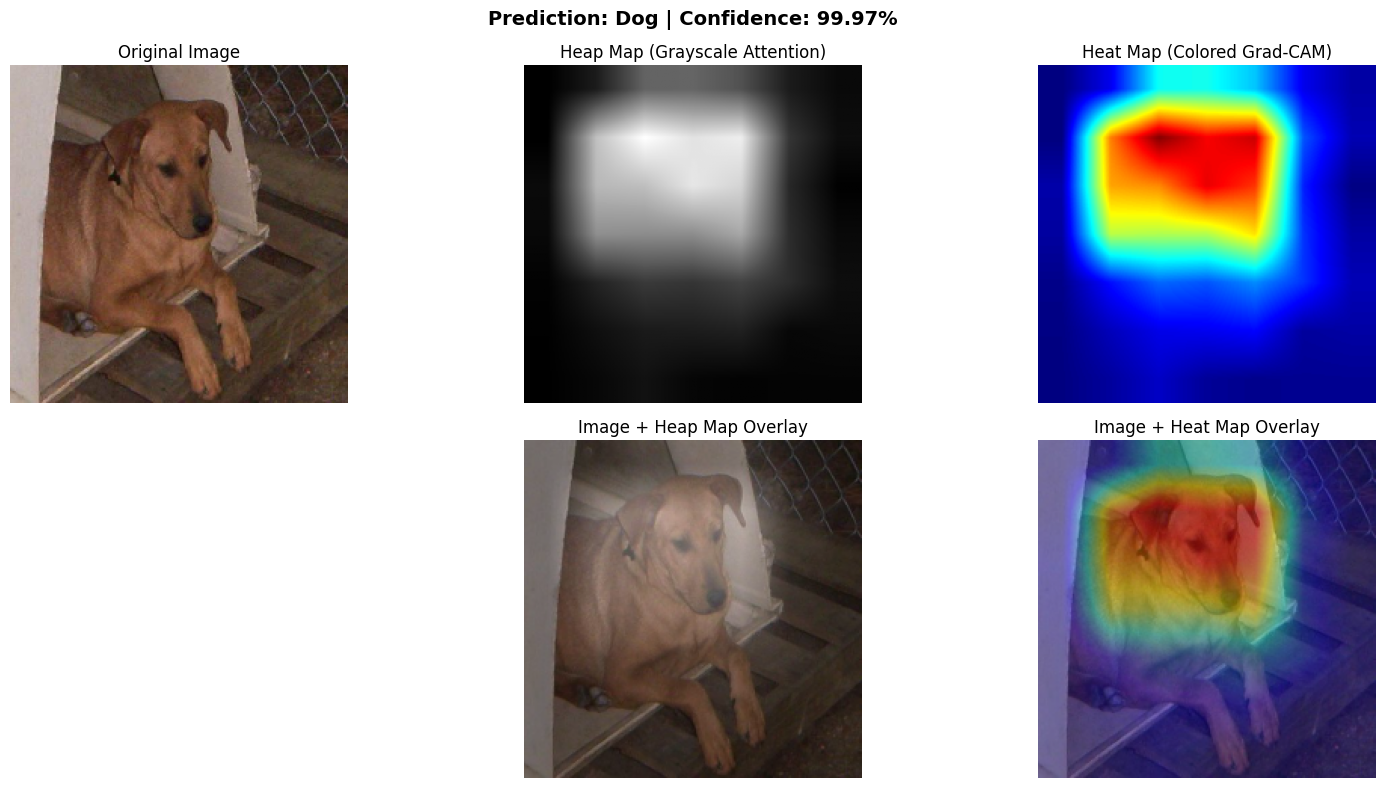

In [175]:
run_complete_image_analysis(
    model,
    "/content/drive/MyDrive/Image_Classification_Project/dataset/test/dog/100.jpg"
)
